TensorFlow classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


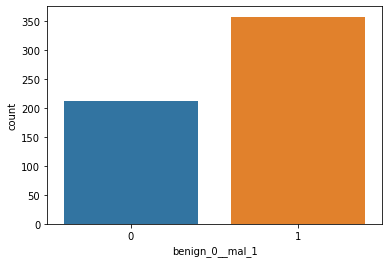

In [8]:
sns.countplot(x = 'benign_0__mal_1', data = df)

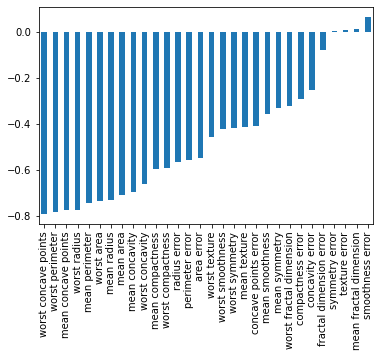

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

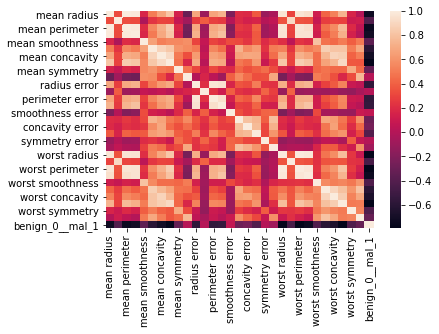

In [13]:
sns.heatmap(df.corr())

In [6]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.fit_transform(X_test)

Work with neuron nets

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense,Dropout

In [15]:
X_train.shape

(426, 30)

In [16]:
model = Sequential()

In [17]:
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#Binary classification problem
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

Classes
class Adadelta: Optimizer that implements the Adadelta algorithm.

class Adagrad: Optimizer that implements the Adagrad algorithm.

class Adam: Optimizer that implements the Adam algorithm.

class Adamax: Optimizer that implements the Adamax algorithm.

class Ftrl: Optimizer that implements the FTRL algorithm.

class Nadam: Optimizer that implements the NAdam algorithm.

class Optimizer: Base class for Keras optimizers.

class RMSprop: Optimizer that implements the RMSprop algorithm.

class SGD: Gradient descent (with momentum) optimizer.




This is where optimizers come in. They tie together the loss function and model parameters by updating the model in response to the output of the loss function. In simpler terms, optimizers shape and mold your model into its most accurate possible form by futzing with the weights. The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction.

Any discussion about optimizers needs to begin with the most popular one, and it’s called Gradient Descent. This algorithm is used across all types of Machine Learning (and other math problems) to optimize. It’s fast, robust, and flexible. Here’s how it works:

1)Calculate what a small change in each individual weight would do to the loss function (i.e. which direction should the hiker walk in)

2)Adjust each individual weight based on its gradient (i.e. take a small step in the determined direction)

3)Keep doing steps #1 and #2 until the loss function gets as low as possible

![](Градиент_холма.gif)
Операция градиента преобразует холм (слева), если смотреть на него сверху, в поле векторов (справа). Видно, что векторы направлены «в горку» и чем длиннее, тем круче наклон.

Градие́нт (от лат. gradiens, род. п. gradientis «шагающий, растущий») — вектор, своим направлением указывающий направление наибольшего возрастания некоторой величины, значение которой меняется от одной точки пространства к другой (скалярного поля), а по величине (модулю) равный скорости роста этой величины в этом направлении.

![](4.svg)

Adam

Adam stands for adaptive moment estimation, and is another way of using past gradients to calculate current gradients. Adam also utilizes the concept of momentum by adding fractions of previous gradients to the current one. This optimizer has become pretty widespread, and is practically accepted for use in training neural nets.

It’s easy to get lost in the complexity of some of these new optimizers. Just remember that they all have the same goal: minimizing our loss function. Even the most complex ways of doing that are simple at their core.

In [22]:
model.fit(x=X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 5s 211ms/step - loss: 0.6483 - val_loss: 0.6101
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6175 - val_loss: 0.5731
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5799 - val_loss: 0.5349
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5368 - val_loss: 0.4935
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5048 - val_loss: 0.4486
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4729 - val_loss: 0.4093
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4242 - val_loss: 0.3643
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3819 - val_loss: 0.3389
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3340 - val_loss: 0.2953
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3170 - val_loss: 0.2722
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0432 - val_loss: 0.2800
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0410 - val_loss: 0.2649
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0482 - val_loss: 0.2713
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0595 - val_loss: 0.2839
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0473 - val_loss: 0.2932
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0353 - val_loss: 0.2918
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0461 - val_loss: 0.2945
Epoch 90/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0574 - val_loss: 0.2905
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0573 - val_loss: 0.2765
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0369 - val_loss: 0.2982

14/14 [==============================] - 0s 7ms/step - loss: 0.0387 - val_loss: 0.4399
Epoch 165/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0492 - val_loss: 0.4354
Epoch 166/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0496 - val_loss: 0.4055
Epoch 167/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0463 - val_loss: 0.4344
Epoch 168/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0316 - val_loss: 0.4721
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0376 - val_loss: 0.4578
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0548 - val_loss: 0.4302
Epoch 171/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0637 - val_loss: 0.4631
Epoch 172/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0385 - val_loss: 0.4189
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0373 - val_loss: 0.4569
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0522 - val_loss: 0.6071
Epoch 246/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0313 - val_loss: 0.6069
Epoch 247/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0276 - val_loss: 0.6308
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0454 - val_loss: 0.5849
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0581 - val_loss: 0.6315
Epoch 250/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.6152
Epoch 251/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0343 - val_loss: 0.6485
Epoch 252/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0388 - val_loss: 0.5909
Epoch 253/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0366 - val_loss: 0.6534
Epoch 254/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0402 - val_loss: 0.6441
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0328 - val_loss: 0.8118
Epoch 327/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0295 - val_loss: 0.8013
Epoch 328/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.7545
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0412 - val_loss: 0.7636
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0408 - val_loss: 0.8166
Epoch 331/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0316 - val_loss: 0.8440
Epoch 332/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0345 - val_loss: 0.7673
Epoch 333/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0232 - val_loss: 0.8347
Epoch 334/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.7974
Epoch 335/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0303 - val_loss: 0.7840
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0298 - val_loss: 0.9478
Epoch 408/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0349 - val_loss: 1.0142
Epoch 409/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0226 - val_loss: 1.0129
Epoch 410/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0272 - val_loss: 0.9376
Epoch 411/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0356 - val_loss: 0.9329
Epoch 412/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0327 - val_loss: 1.0499
Epoch 413/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0398 - val_loss: 0.8657
Epoch 414/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0262 - val_loss: 1.0207
Epoch 415/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0266 - val_loss: 0.9495
Epoch 416/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0260 - val_loss: 1.0438


14/14 [==============================] - 0s 4ms/step - loss: 0.0215 - val_loss: 1.1606
Epoch 489/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0354 - val_loss: 1.0108
Epoch 490/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0372 - val_loss: 1.3607
Epoch 491/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0260 - val_loss: 1.0215
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0306 - val_loss: 1.1689
Epoch 493/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0298 - val_loss: 1.0839
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0271 - val_loss: 1.2257
Epoch 495/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0258 - val_loss: 1.1027
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0224 - val_loss: 1.1174
Epoch 497/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0221 - val_loss: 1.1232
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0316 - val_loss: 1.2593
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0354 - val_loss: 1.1978
Epoch 571/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0258 - val_loss: 1.2518
Epoch 572/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0236 - val_loss: 1.2634
Epoch 573/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0291 - val_loss: 1.2727
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0173 - val_loss: 1.3384
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 1.1541
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0272 - val_loss: 1.3481
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0223 - val_loss: 1.3279
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0140 - val_loss: 1.2938
Epoc

тут продолжу о loss-functions

Cross-entropy for a binary or two-class prediction problem is actually calculated as the average cross-entropy across all examples.


    from math import log
    #function to calculate binary cross entropy:

    def binary_cross_entropy(actual, predicted):
        sum_score = 0.0
        for i in range(len(actual)):
            sum_score += actual[i] * log(1e-15 + predicted[i])
        mean_sum_score = 1.0 / len(actual) * sum_score
        return -mean_sum_score

4. Hinge Loss

The Hinge loss function is popular with Support Vector Machines(SVMs). These are used for training the classifiers. Let ‘t’ be the target output such that t = -1 or 1, and the classifier score be ‘y’, then the hinge loss for the prediction is given as: 
    
    L(y) = max(0, 1-t.y)

5.The Huber Loss Function.

The Huber Loss offers the best of both worlds by balancing the MSE and MAE together. We can define it using the following piecewise function:
![Title](2.png)
What this equation actually means is that for loss values less than 

What this equation actually means is that for loss values less than delta, use the MSE; for loss values greater than delta, use the MAE. This effectively combines the best of both worlds from the two loss functions.

    #function to calculate Huber loss
    def huber_loss(y_predicted, y_actual, delta=1.0):
        huber_mse = 0.5*(y_actual-y_predicted)**2
        huber_mae = delta * (np.abs(y_actual - y_predicted) - 0.5 * delta)

    return np.where(np.abs(y_actual - y_predicted) <= delta, 
                             huber_mse,  huber_mae)

![](3.png)

In [23]:
losses = pd.DataFrame(model.history.history)

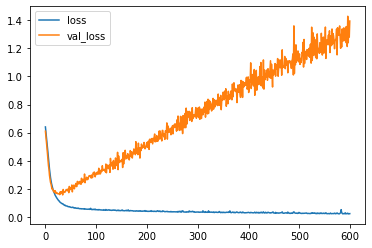

In [25]:
losses.plot()

What we can see above is a perfect example of overfitting

Ансамбль методов (Ensemble learning)
Обучение машин
Ансамбль методов в статистике и обучении машин использует несколько обучающих алгоритмов с целью получения лучшей эффективности прогнозирования, чем могли бы получить от каждого обучающего алгоритма по отдельности

Ниже для предотвращения оверфиттинга мы попробуем как-бы заранее остановить обучение нашей сетки. "Callbaccks"

In [29]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#Binary classification problem
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [31]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1,patience = 25)
#patience: Number of epochs with no improvement after which training will be stopped.
# verbose mode - It provides additional details as to what the computer is doing and what drivers and software it 
#is loading during startup.
#This level of detail can be helpful for troubleshooting problems with hardware or software 
#upon startup or after the operating system has loaded.

Validation loss is the same metric as training loss, but it is not used to update the weights.

In [32]:
model.fit(x=X_train, y = y_train, epochs = 600,
          validation_data = (X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 31ms/step - loss: 0.7044 - val_loss: 0.6878
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6800 - val_loss: 0.6703
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6632 - val_loss: 0.6470
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6374 - val_loss: 0.6200
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6018 - val_loss: 0.5807
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5709 - val_loss: 0.5298
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5337 - val_loss: 0.4657
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4660 - val_loss: 0.4014
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3924 - val_loss: 0.3495
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3715 - val_loss: 0.3063
Epoch 11

In [33]:
model_loss = pd.DataFrame(model.history.history)

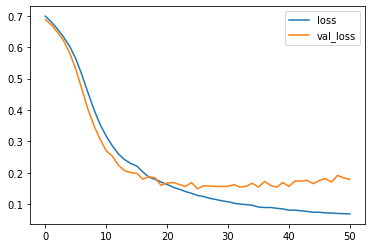

In [34]:
model_loss.plot()

Now i will try to add drop out neurons, which will drop some neurons
randomly

In [36]:
from tensorflow.keras.layers import Dropout

In [37]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5)) #during each epoch half of neurons in
                        #that layer will be turned off randomly
model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))

#Binary classification problem
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [38]:
model.fit(x=X_train, y = y_train, epochs = 600,
          validation_data = (X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 31ms/step - loss: 0.6838 - val_loss: 0.6516
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6632 - val_loss: 0.6314
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6501 - val_loss: 0.6058
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6258 - val_loss: 0.5852
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6115 - val_loss: 0.5600
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5988 - val_loss: 0.5302
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5811 - val_loss: 0.5035
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5746 - val_loss: 0.4751
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5051 - val_loss: 0.4482
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.4892 - val_loss: 0.4230
Epoch 

Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1088 - val_loss: 0.1513
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1075 - val_loss: 0.1559
Epoch 85/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1080 - val_loss: 0.1717
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1156 - val_loss: 0.1393
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1092 - val_loss: 0.1472
Epoch 88/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1300 - val_loss: 0.1632
Epoch 89/600
14/14 [==============================] - 0s 10ms/step - loss: 0.1385 - val_loss: 0.1545
Epoch 90/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0853 - val_loss: 0.1496
Epoch 91/600
14/14 [==============================] - 0s 10ms/step - loss: 0.1179 - val_loss: 0.1741
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1124 - val_loss: 0.150

In [40]:
model_loss = pd.DataFrame(model.history.history)

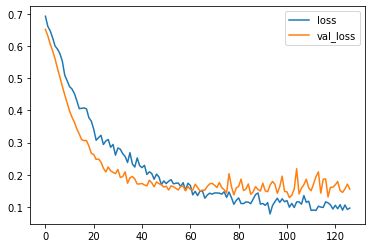

In [41]:
model_loss.plot()

This is a much better behaviour

In [43]:
predictions = model.predict_classes(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        55
           1       0.99      0.92      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [47]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 7 81]]
